# **Pizza Place Sales**
  A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas, served, with additional details on the type, size, quantity, price, and ingredients.
# **Recommended Analysis**
* How many customers do we have each day? Are there any peak hours?
* How many pizzas are typically in order? Do we have any bestsellers?
* How much money did we make this year? Can we identify any seasonality in the sales?
* Are there any pizzas we should take off the menu, or any promotions we could leverage?

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-place-sales/pizza_types.csv
/kaggle/input/pizza-place-sales/orders.csv
/kaggle/input/pizza-place-sales/order_details.csv
/kaggle/input/pizza-place-sales/pizzas.csv


In [3]:
#Importing all neccessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#importing/reading dataset form csv file formate
df1=pd.read_csv('/kaggle/input/pizza-place-sales/pizza_types.csv',encoding='unicode_escape')
df2=pd.read_csv('/kaggle/input/pizza-place-sales/orders.csv',)
df3=pd.read_csv('/kaggle/input/pizza-place-sales/order_details.csv')
df4=pd.read_csv('/kaggle/input/pizza-place-sales/pizzas.csv')

In [5]:
#pizza_type_id/name/category/ingredients
df1

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [6]:
df1.shape


(32, 4)

In [7]:
df2

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [8]:
df2.shape

(21350, 3)

In [9]:
#order_details_id/order_id/pizza+id/quantity
df3

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [10]:
df3.shape

(48620, 4)

In [11]:
df4

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [12]:
f1 = df1.copy()
f2 = df2.copy()
f3 = df3.copy()
f4 = df4.copy()

# for futher analysis ,i make copy of data and check all dataset(f1,f2,f3,f4)
now proceed to analysis and given questions

In [13]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [14]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [15]:
f3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
f4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


* from above ,f2 &f3 are big data file ( 21350 entries & 48620 entries resp. )
* no null value


In [17]:
f1.columns


Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

In [18]:
f2.columns


Index(['order_id', 'date', 'time'], dtype='object')

In [19]:
f3.columns


Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')

In [20]:
f4.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

# for better and easy to handle , renaming order_id as customer_id & order_details_id as order_id in f2 & f3

In [21]:
f3.rename(columns={'order_id':'Customer_id'},inplace = True)
f3

,order_details_id,Customer_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [22]:
f3.rename(columns={'order_details_id':'order_id'},inplace = True)
f3

,order_id,Customer_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [23]:
f2.rename(columns={'order_id':'Customer_id'},inplace = True)
f2

,Customer_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


# How many customers do we have each day? Are there any peak hours?
f

In [24]:
x=f2.groupby('date')['Customer_id'].count()
x.mean()




59.63687150837989

Text(0.5, 1.0, 'Day frequency')

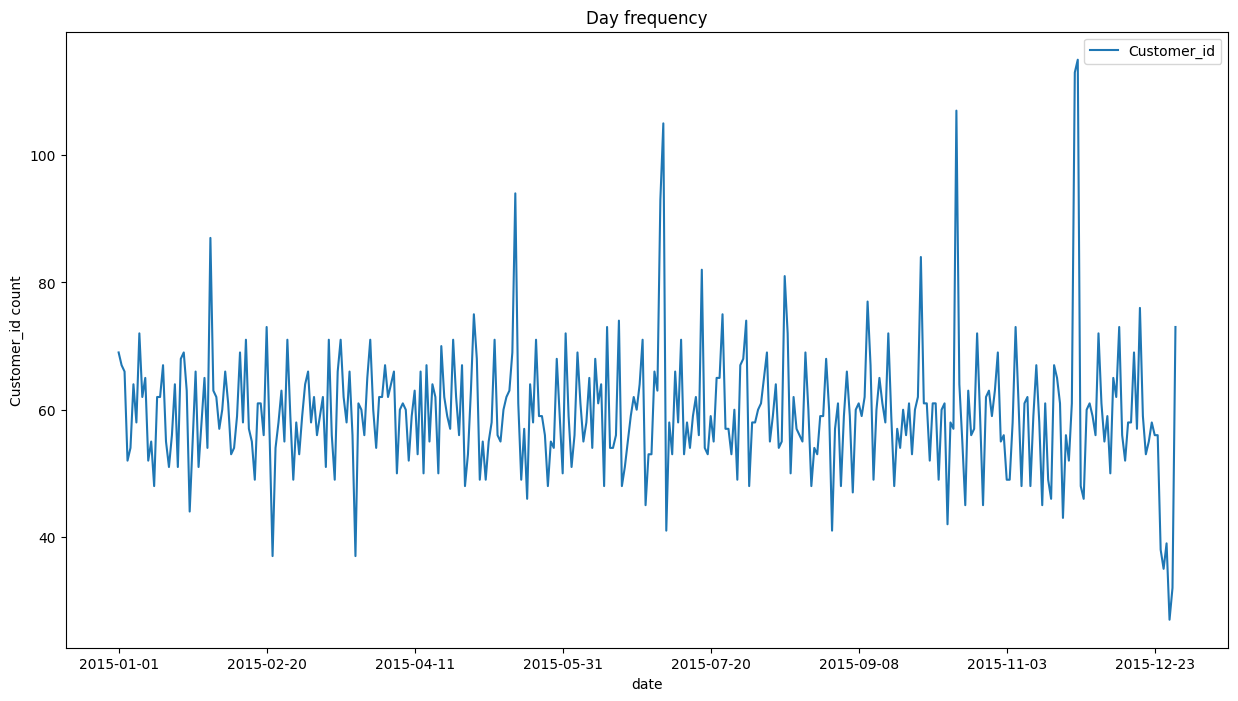

In [25]:
x.to_frame().plot(kind='line',figsize=(15,8))
plt.ylabel('Customer_id count')
plt.title('Day frequency')

In [26]:
merge_df = f2.merge(f3, how='inner', on=['Customer_id'])
merge_df.head()

,Customer_id,date,time,order_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1


In [27]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_id  48620 non-null  int64 
 1   date         48620 non-null  object
 2   time         48620 non-null  object
 3   order_id     48620 non-null  int64 
 4   pizza_id     48620 non-null  object
 5   quantity     48620 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ MB


In [28]:
merge_df.shape

(48620, 6)

In [29]:
merge_df.describe()

,Customer_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622
std,6180.119770,14035.529381,0.143077
min,1.000000,1.000000,1.000000
25%,5337.000000,12155.750000,1.000000
50%,10682.500000,24310.500000,1.000000
75%,16100.000000,36465.250000,1.000000
max,21350.000000,48620.000000,4.000000


In [30]:
merge_df['date']=pd.to_datetime(merge_df['date'])
merge_df['time']=pd.to_datetime(merge_df['time'])

/tmp/ipykernel_41/2845979538.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df['time']=pd.to_datetime(merge_df['time'])


In [31]:
merge_df['hour'] = pd.to_datetime(merge_df['time'], infer_datetime_format=True).dt.hour
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer_id  48620 non-null  int64         
 1   date         48620 non-null  datetime64[ns]
 2   time         48620 non-null  datetime64[ns]
 3   order_id     48620 non-null  int64         
 4   pizza_id     48620 non-null  object        
 5   quantity     48620 non-null  int64         
 6   hour         48620 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(1)
memory usage: 2.4+ MB


/tmp/ipykernel_41/2331793376.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  merge_df['hour'] = pd.to_datetime(merge_df['time'], infer_datetime_format=True).dt.hour


In [32]:
y=merge_df.groupby('hour')['Customer_id'].count()
y

hour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: Customer_id, dtype: int64

Text(0.5, 1.0, 'peak Hours')

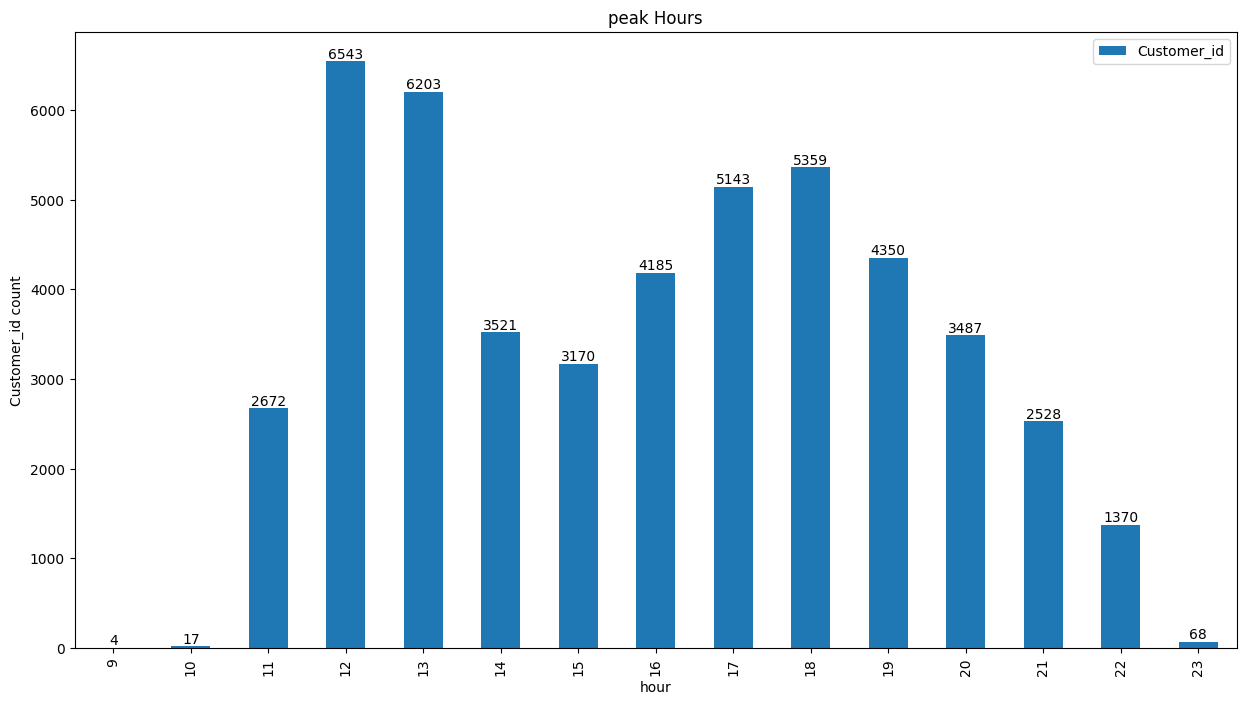

In [33]:
y.to_frame().plot(kind='bar',figsize=(15,8))
for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.ylabel('Customer_id count')
plt.title('peak Hours')

* average 60 custormes came each day
* peak hours 12:00pm to 18:00pm

In [34]:
merge_df

,Customer_id,date,time,order_id,pizza_id,quantity,hour
0,1,2015-01-01,2023-12-25 11:38:36,1,hawaiian_m,1,11
1,2,2015-01-01,2023-12-25 11:57:40,2,classic_dlx_m,1,11
2,2,2015-01-01,2023-12-25 11:57:40,3,five_cheese_l,1,11
3,2,2015-01-01,2023-12-25 11:57:40,4,ital_supr_l,1,11
4,2,2015-01-01,2023-12-25 11:57:40,5,mexicana_m,1,11
...,...,...,...,...,...,...,...
48615,21348,2015-12-31,2023-12-25 21:23:10,48616,ckn_alfredo_m,1,21
48616,21348,2015-12-31,2023-12-25 21:23:10,48617,four_cheese_l,1,21
48617,21348,2015-12-31,2023-12-25 21:23:10,48618,napolitana_s,1,21
48618,21349,2015-12-31,2023-12-25 22:09:54,48619,mexicana_l,1,22


# How many pizzas are typically in order? Do we have any bestsellers?

In [35]:
#pizzas are typically in order
z=merge_df.groupby('quantity')['Customer_id'].count()
z

quantity
1    47693
2      903
3       21
4        3
Name: Customer_id, dtype: int64

<Axes: xlabel='Customer_id', ylabel='quantity'>

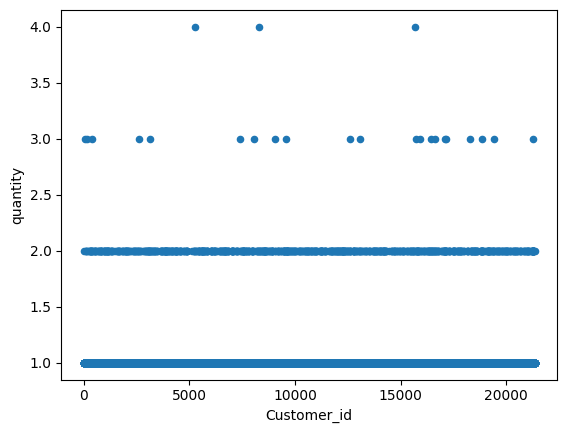

In [36]:
merge_df.plot.scatter("Customer_id","quantity")

* **1-2 pizza's are typically in order**

In [37]:
#bestsellers
f4.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

In [38]:
f1.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

In [39]:
merge_df1 =merge_df.merge(f4, how='inner', on=['pizza_id'])
merge_df1

,Customer_id,date,time,order_id,pizza_id,quantity,hour,pizza_type_id,size,price
0,1,2015-01-01,2023-12-25 11:38:36,1,hawaiian_m,1,11,hawaiian,M,13.25
1,77,2015-01-02,2023-12-25 12:22:46,179,hawaiian_m,1,12,hawaiian,M,13.25
2,146,2015-01-03,2023-12-25 14:22:10,357,hawaiian_m,1,14,hawaiian,M,13.25
3,163,2015-01-03,2023-12-25 16:54:54,389,hawaiian_m,1,16,hawaiian,M,13.25
4,247,2015-01-04,2023-12-25 20:55:29,568,hawaiian_m,1,20,hawaiian,M,13.25
...,...,...,...,...,...,...,...,...,...,...
48615,17492,2015-10-24,2023-12-25 18:58:20,39733,the_greek_xxl,1,18,the_greek,XXL,35.95
48616,18139,2015-11-05,2023-12-25 20:28:52,41183,the_greek_xxl,1,20,the_greek,XXL,35.95
48617,18789,2015-11-17,2023-12-25 11:23:51,42718,the_greek_xxl,1,11,the_greek,XXL,35.95
48618,18919,2015-11-19,2023-12-25 16:58:26,43041,the_greek_xxl,1,16,the_greek,XXL,35.95


In [40]:
merge_df1.shape

(48620, 10)

In [41]:
df=merge_df1.merge(f1, how='inner', on=['pizza_type_id'])
df

,Customer_id,date,time,order_id,pizza_id,quantity,hour,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,2023-12-25 11:38:36,1,hawaiian_m,1,11,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,2023-12-25 12:22:46,179,hawaiian_m,1,12,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,2023-12-25 14:22:10,357,hawaiian_m,1,14,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,2023-12-25 16:54:54,389,hawaiian_m,1,16,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,2023-12-25 20:55:29,568,hawaiian_m,1,20,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,2023-12-25 17:39:57,48176,brie_carre_s,1,17,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,21198,2015-12-28,2023-12-25 15:39:02,48244,brie_carre_s,1,15,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,21225,2015-12-29,2023-12-25 13:20:17,48311,brie_carre_s,1,13,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,21282,2015-12-31,2023-12-25 12:09:59,48456,brie_carre_s,1,12,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


In [42]:
df.shape

(48620, 13)

In [43]:
a=df.groupby('name')['quantity'].count()
a

name
The Barbecue Chicken Pizza                    2372
The Big Meat Pizza                            1811
The Brie Carre Pizza                           480
The Calabrese Pizza                            927
The California Chicken Pizza                  2302
The Chicken Alfredo Pizza                      980
The Chicken Pesto Pizza                        961
The Classic Deluxe Pizza                      2416
The Five Cheese Pizza                         1359
The Four Cheese Pizza                         1850
The Greek Pizza                               1406
The Green Garden Pizza                         987
The Hawaiian Pizza                            2370
The Italian Capocollo Pizza                   1414
The Italian Supreme Pizza                     1849
The Italian Vegetables Pizza                   975
The Mediterranean Pizza                        923
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Pepper Salami Pizza   

In [44]:
df['name'].value_counts()

name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza           

Text(0.5, 1.0, 'PIZZA COUNT')

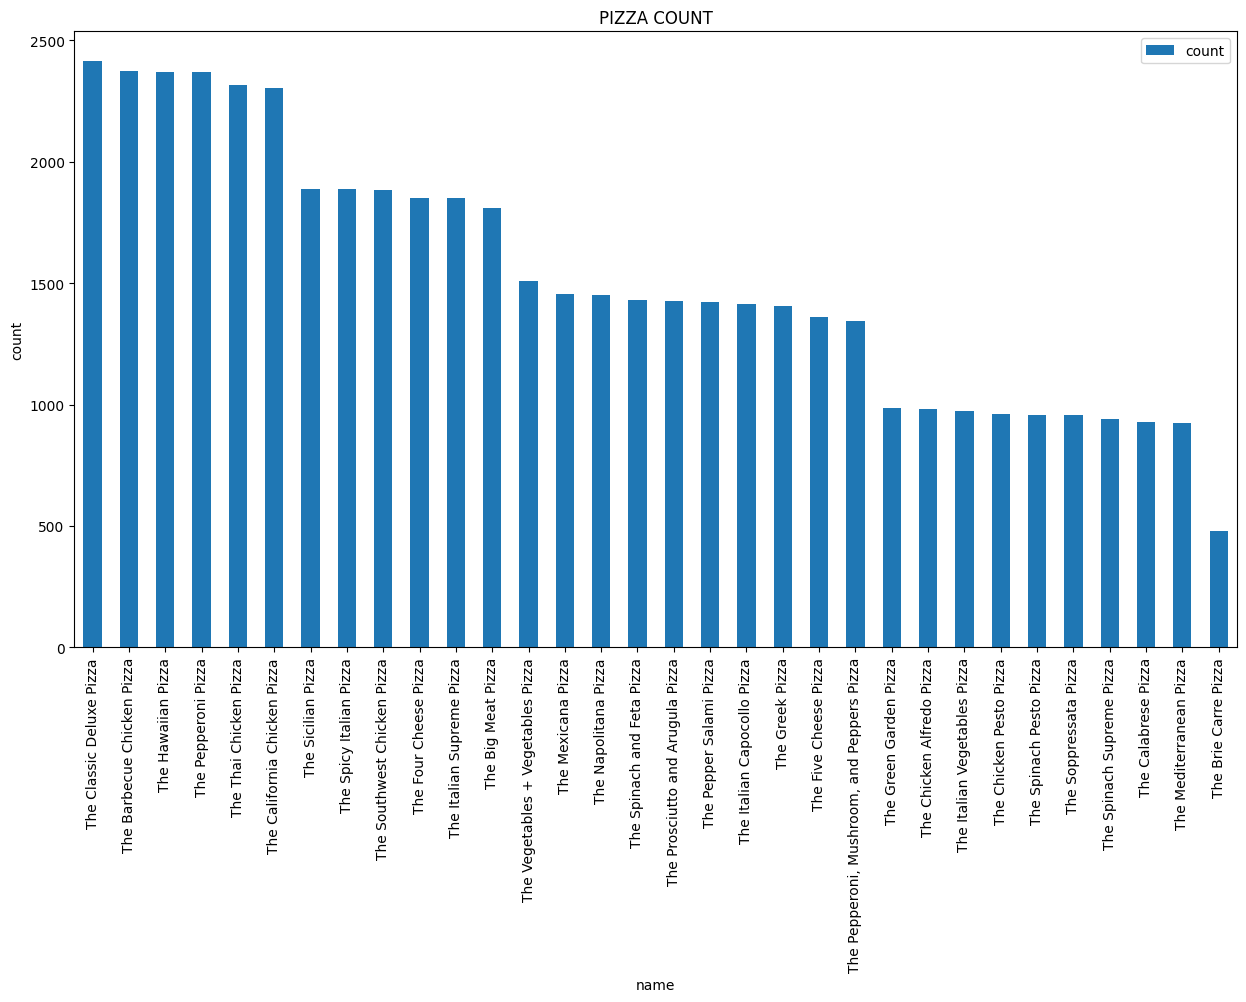

In [107]:
df['name'].value_counts().to_frame().plot(kind='bar',figsize=(15,8))

plt.ylabel('count')
plt.title('PIZZA COUNT')

Text(0.5, 1.0, 'TOP 10')

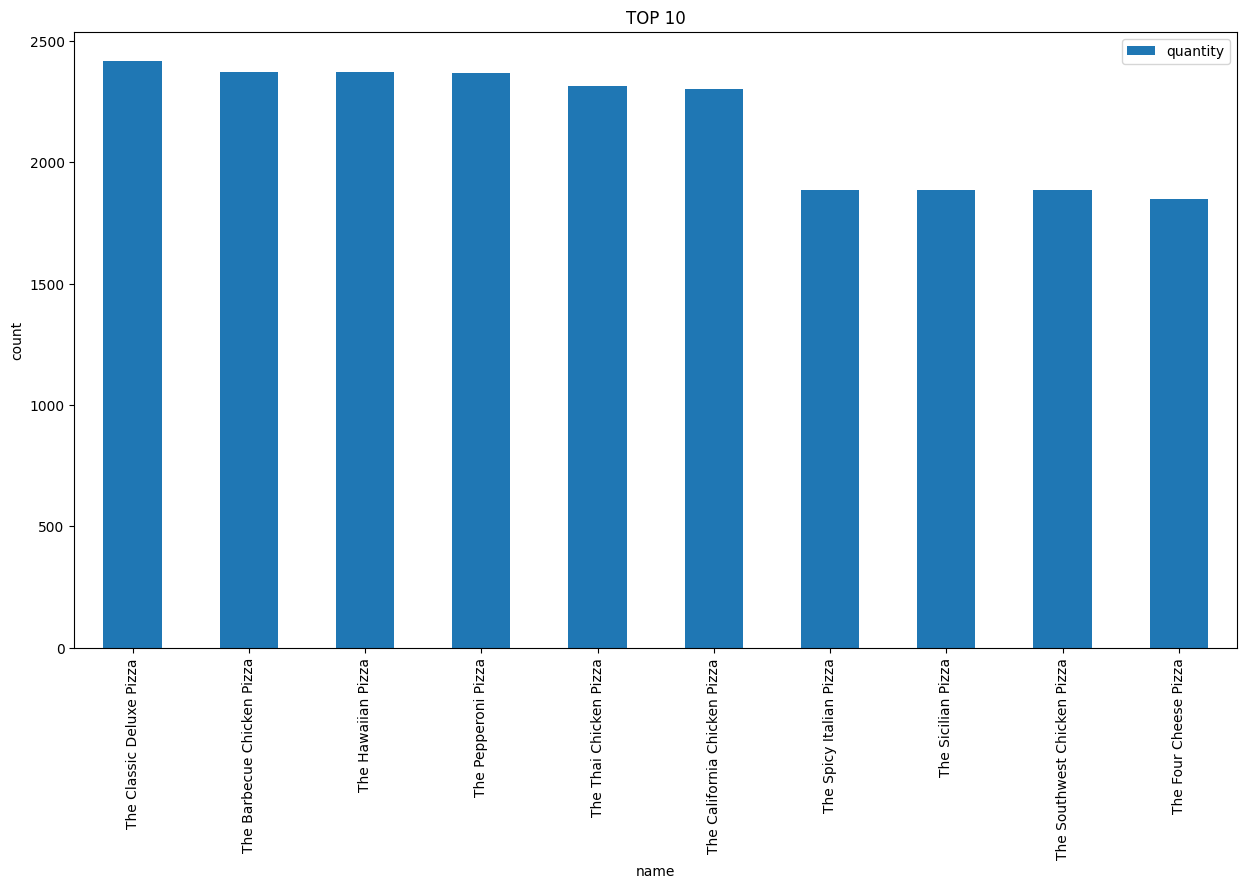

In [106]:
a.sort_values(ascending = False).head(10).to_frame().plot(kind='bar',figsize=(15,8))

plt.ylabel('count')
plt.title('TOP 10')

**bestseller pizza's(quantity)**
1. the classic deluxe pizza
2. the barbecue chicken pizza
3. the hawaiian pizza
4. the pepperoni pizza
5. the thai chicken pizza

# **How much money did we make this year? Can we identify any seasonality in the sales?**

In [47]:
b=df.groupby('name')['price'].sum()
b

name
The Barbecue Chicken Pizza                    41683.00
The Big Meat Pizza                            21732.00
The Brie Carre Pizza                          11352.00
The Calabrese Pizza                           15763.75
The California Chicken Pizza                  40166.50
The Chicken Alfredo Pizza                     16779.00
The Chicken Pesto Pizza                       16484.75
The Classic Deluxe Pizza                      37631.50
The Five Cheese Pizza                         25141.50
The Four Cheese Pizza                         31361.10
The Greek Pizza                               28170.10
The Green Garden Pizza                        13819.50
The Hawaiian Pizza                            31561.75
The Italian Capocollo Pizza                   24641.50
The Italian Supreme Pizza                     32856.25
The Italian Vegetables Pizza                  15930.75
The Mediterranean Pizza                       15163.00
The Mexicana Pizza                            26243.00
The N

In [48]:
b.sum()

801944.7

# **Total revenue-801944.7**

In [49]:
df['months'] = pd.to_datetime(df['date'], infer_datetime_format=True).dt.month

/tmp/ipykernel_41/3442434652.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['months'] = pd.to_datetime(df['date'], infer_datetime_format=True).dt.month


In [50]:
df.head(5)

,Customer_id,date,time,order_id,pizza_id,quantity,hour,pizza_type_id,size,price,name,category,ingredients,months
0,1,2015-01-01,2023-12-25 11:38:36,1,hawaiian_m,1,11,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1
1,77,2015-01-02,2023-12-25 12:22:46,179,hawaiian_m,1,12,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1
2,146,2015-01-03,2023-12-25 14:22:10,357,hawaiian_m,1,14,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1
3,163,2015-01-03,2023-12-25 16:54:54,389,hawaiian_m,1,16,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1
4,247,2015-01-04,2023-12-25 20:55:29,568,hawaiian_m,1,20,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1


In [63]:
c=df.groupby('months')['price'].sum()
c

months
1     68472.70
2     64067.40
3     69198.00
4     67286.20
5     69939.35
6     66796.30
7     71027.45
8     67068.80
9     63018.00
10    62566.50
11    69054.00
12    63450.00
Name: price, dtype: float64

Text(0.5, 1.0, 'Revenue')

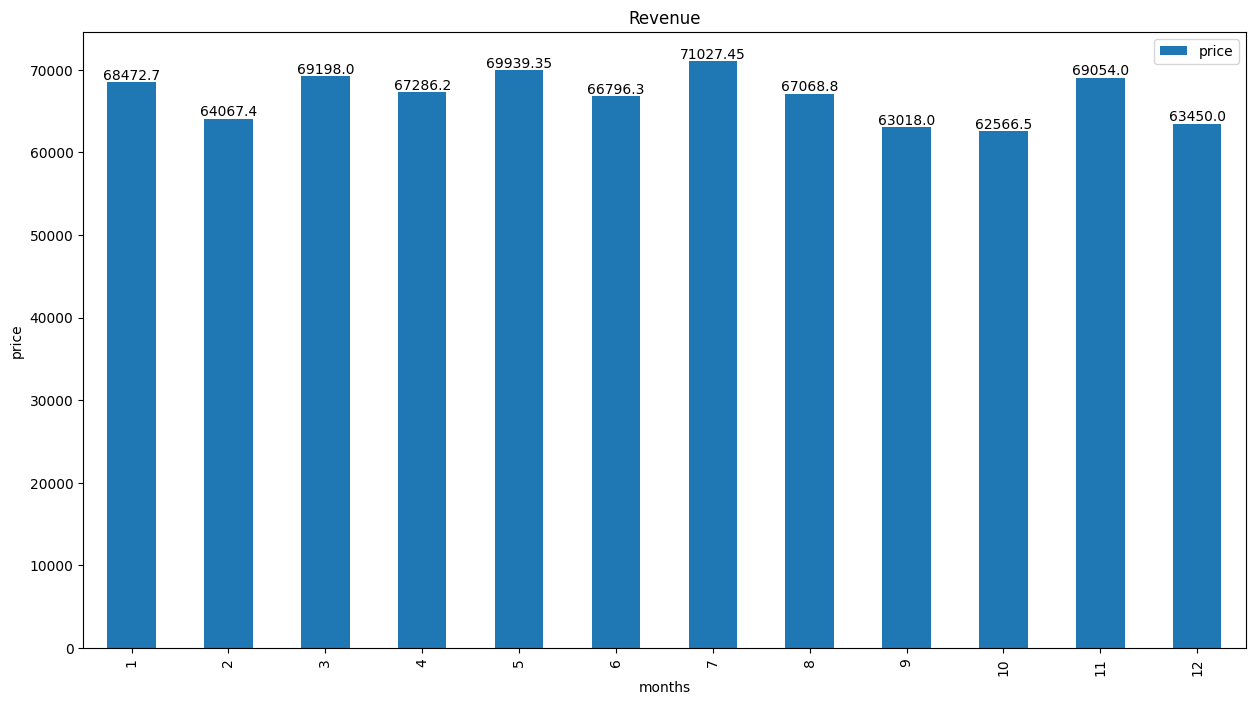

In [73]:
c.to_frame().plot(kind='bar',figsize=(15,8))
for i, v in enumerate(c):
    plt.text(i, v, str(v), ha='center', va='bottom')


plt.ylabel('price')
plt.title('Revenue')

In [61]:
d=df.groupby('months')['order_id'].count()
d

months
1     4156
2     3892
3     4186
4     4067
5     4239
6     4025
7     4301
8     4094
9     3819
10    3797
11    4185
12    3859
Name: order_id, dtype: int64

Text(0.5, 1.0, 'month counts')

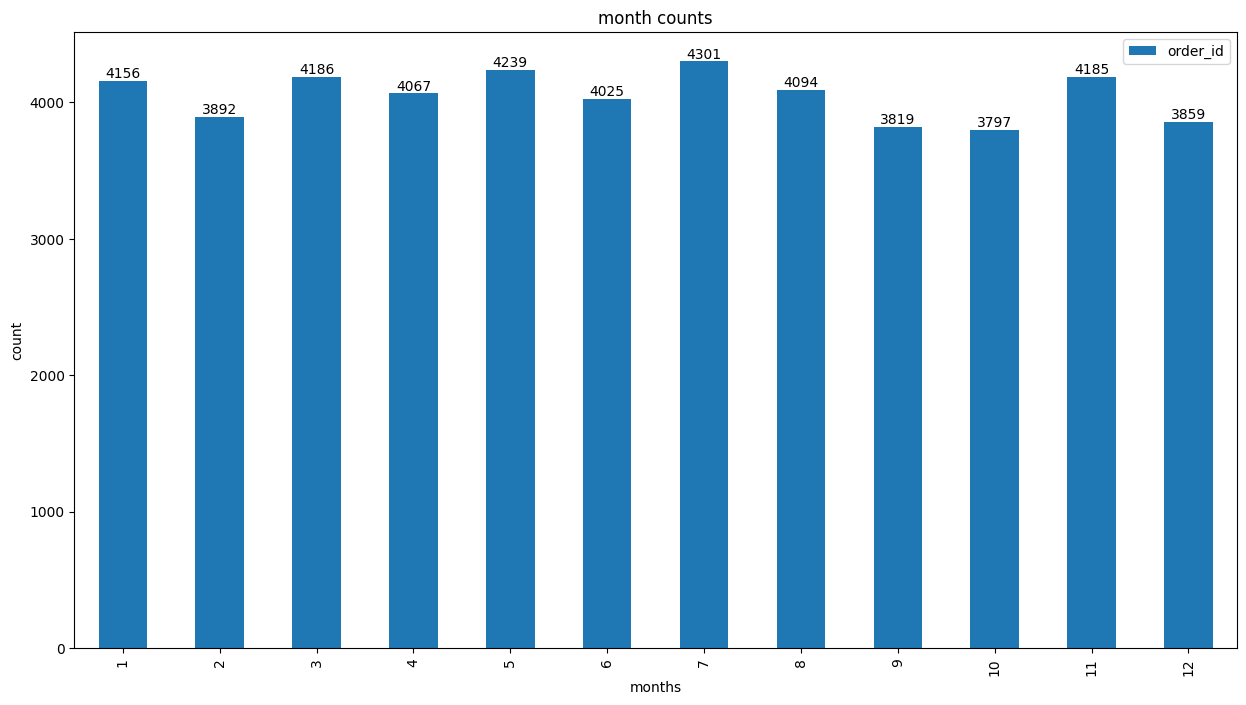

In [105]:
d.to_frame().plot(kind='bar',figsize=(15,8))
for i, v in enumerate(d):
    plt.text(i, v, str(v), ha='center', va='bottom')


plt.ylabel('count')
plt.title('month counts')

* Overall selas of pizza's in term of revenue and count, shows increase in months of non-holidays
* the dataset was from USA(price in doller)in holiday months there were slitly decrease in pizza sales as shown in above graph.(sept.,oct.,& dec.)
**Columbus Day - October ,Veterans Day - November ,Thanksgiving Day - November ,Christmas Day - December,New Year's Day - January**

# Are there any pizzas we should take off the menu, or any promotions we could leverage?

In [74]:
a.sort_values(ascending =True).head(10)

name
The Brie Carre Pizza            480
The Mediterranean Pizza         923
The Calabrese Pizza             927
The Spinach Supreme Pizza       940
The Soppressata Pizza           957
The Spinach Pesto Pizza         957
The Chicken Pesto Pizza         961
The Italian Vegetables Pizza    975
The Chicken Alfredo Pizza       980
The Green Garden Pizza          987
Name: quantity, dtype: int64

Text(0.5, 1.0, 'Bottom 10')

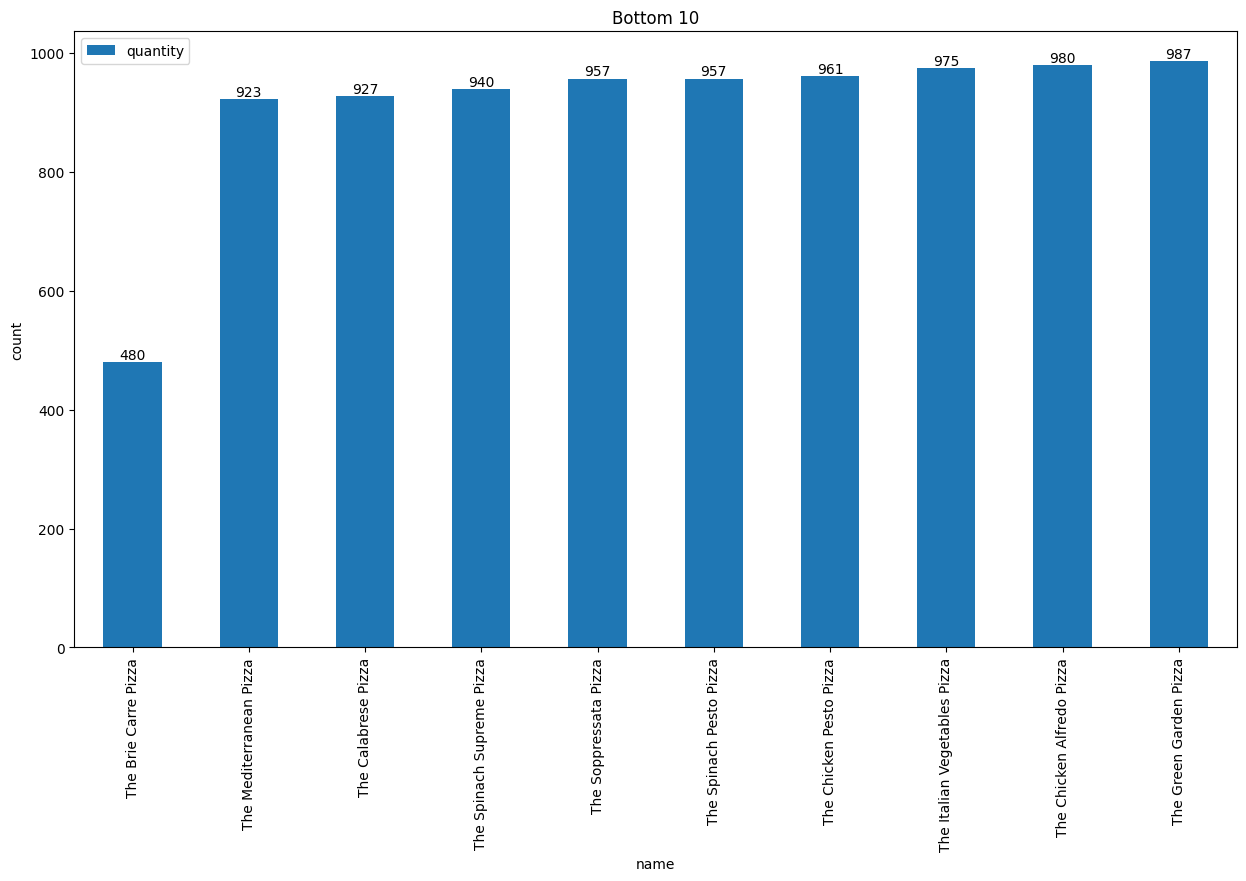

In [77]:
a.sort_values(ascending =True).head(10).to_frame().plot(kind='bar',figsize=(15,8))
for i, v in enumerate(a.sort_values(ascending =True).head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('count')
plt.title('Bottom 10')

In [79]:
e=df.groupby('size')['quantity'].count()
e

size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: quantity, dtype: int64

Text(0.5, 1.0, 'size vs count')

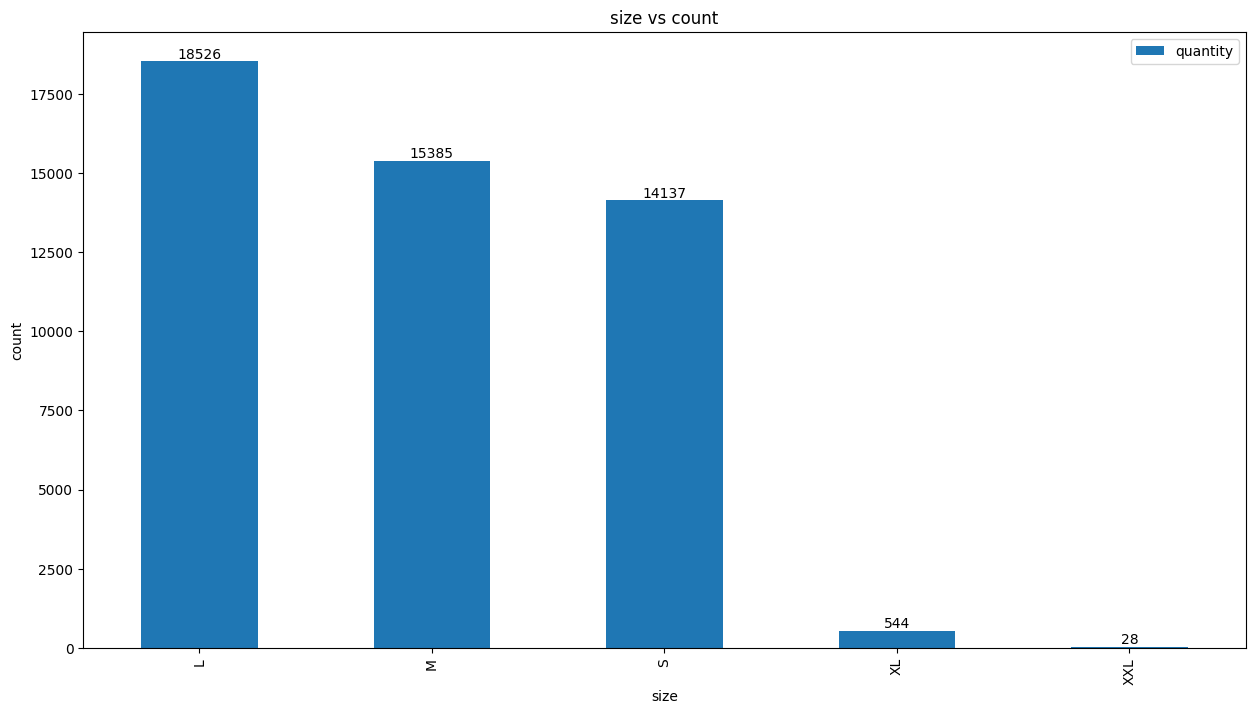

In [104]:
e.to_frame().plot(kind='bar',figsize=(15,8))
for i, v in enumerate(e):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('count')
plt.title('size vs count')

In [89]:
h=df.groupby('pizza_id')['quantity'].count()
h


pizza_id
bbq_ckn_l         967
bbq_ckn_m         926
bbq_ckn_s         479
big_meat_s       1811
brie_carre_s      480
                 ... 
the_greek_xl      544
the_greek_xxl      28
veggie_veg_l      423
veggie_veg_m      630
veggie_veg_s      457
Name: quantity, Length: 91, dtype: int64

In [90]:
h.sort_values(ascending = False)

pizza_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: quantity, Length: 91, dtype: int64

Text(0.5, 1.0, 'count vs pizza_id')

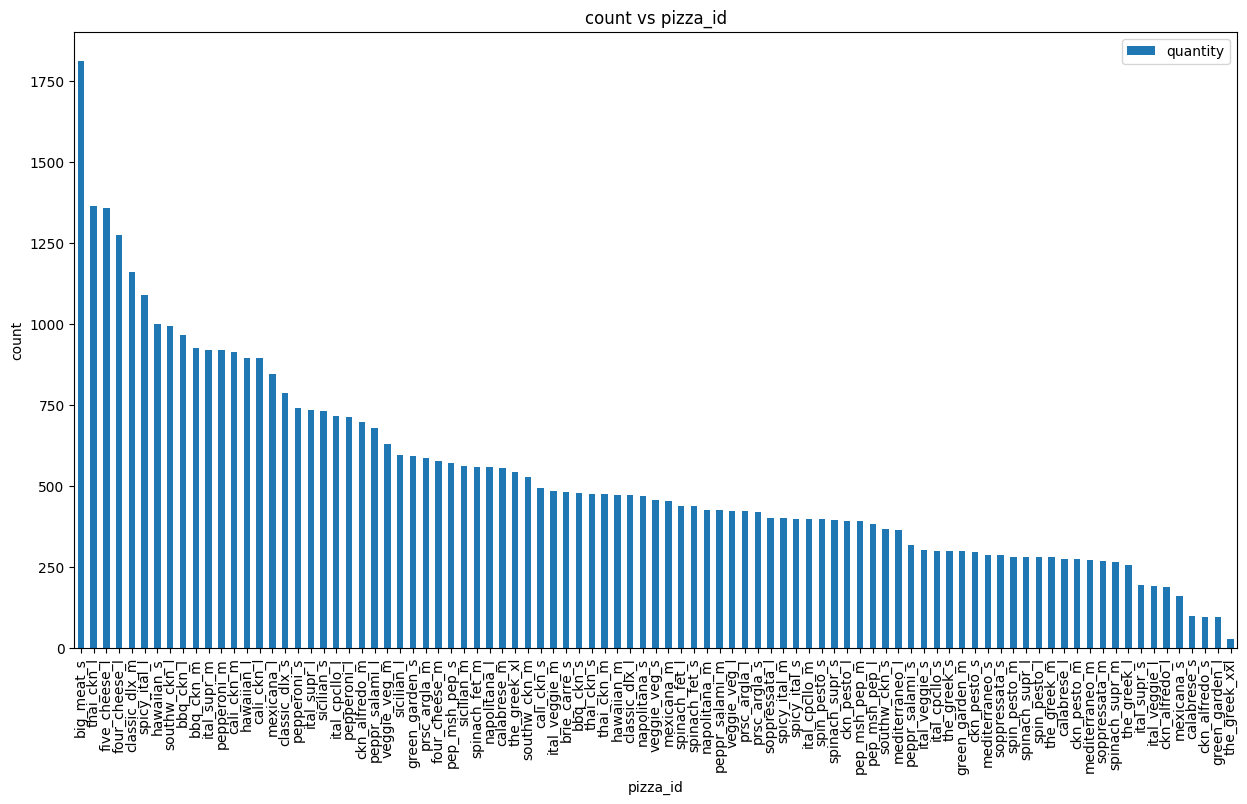

In [102]:
h.sort_values(ascending = False).to_frame().plot(kind='bar',figsize=(15,8))
plt.ylabel('count')
plt.title('count vs pizza_id')

In [91]:
h.sort_values(ascending = True)

pizza_id
the_greek_xxl       28
green_garden_l      94
ckn_alfredo_s       96
calabrese_s         99
mexicana_s         160
                  ... 
classic_dlx_m     1159
four_cheese_l     1273
five_cheese_l     1359
thai_ckn_l        1365
big_meat_s        1811
Name: quantity, Length: 91, dtype: int64

Text(0.5, 1.0, 'SIZES')

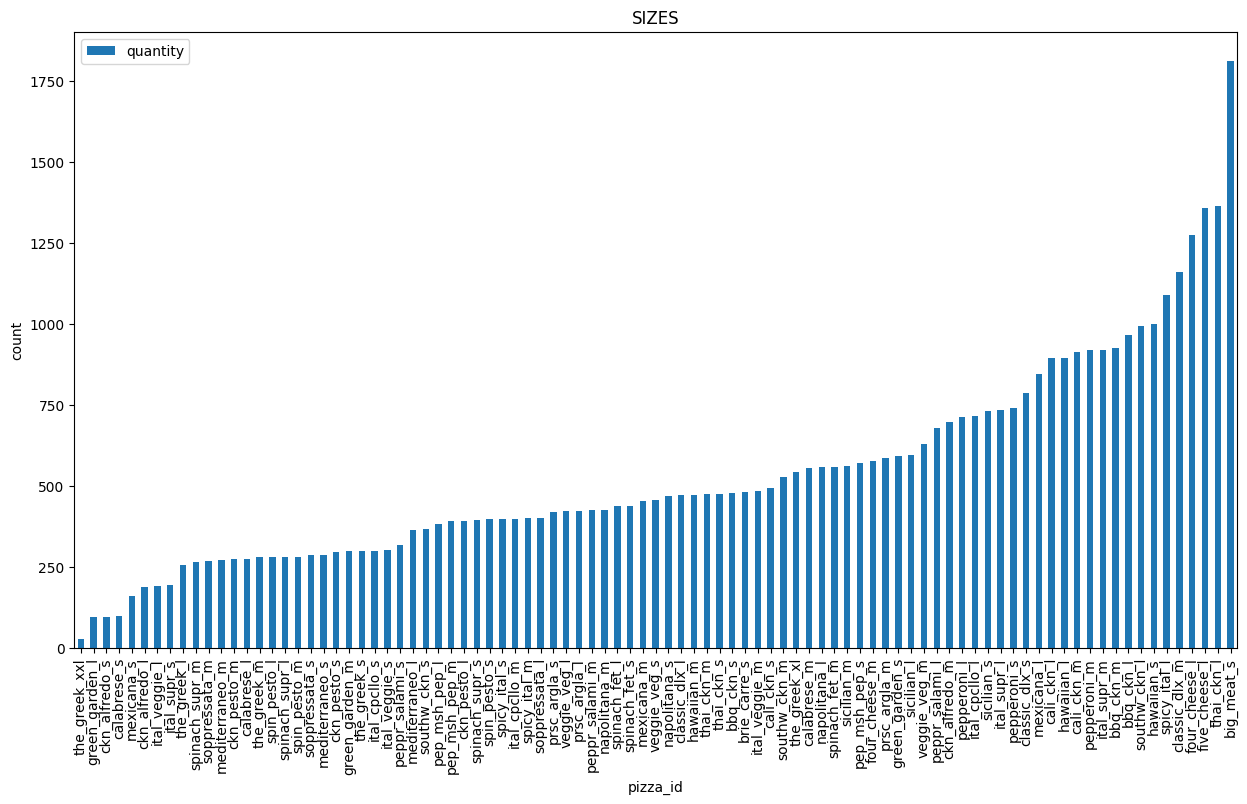

In [95]:
h.sort_values(ascending =True).to_frame().plot(kind='bar',figsize=(15,8))
plt.ylabel('count')
plt.title('SIZES')

In [100]:
f=df.groupby('size')['price'].sum()
f

size
L      366862.1
M      245409.5
S      174794.5
XL      13872.0
XXL      1006.6
Name: price, dtype: float64

Text(0.5, 1.0, 'SIZES vs PRICE')

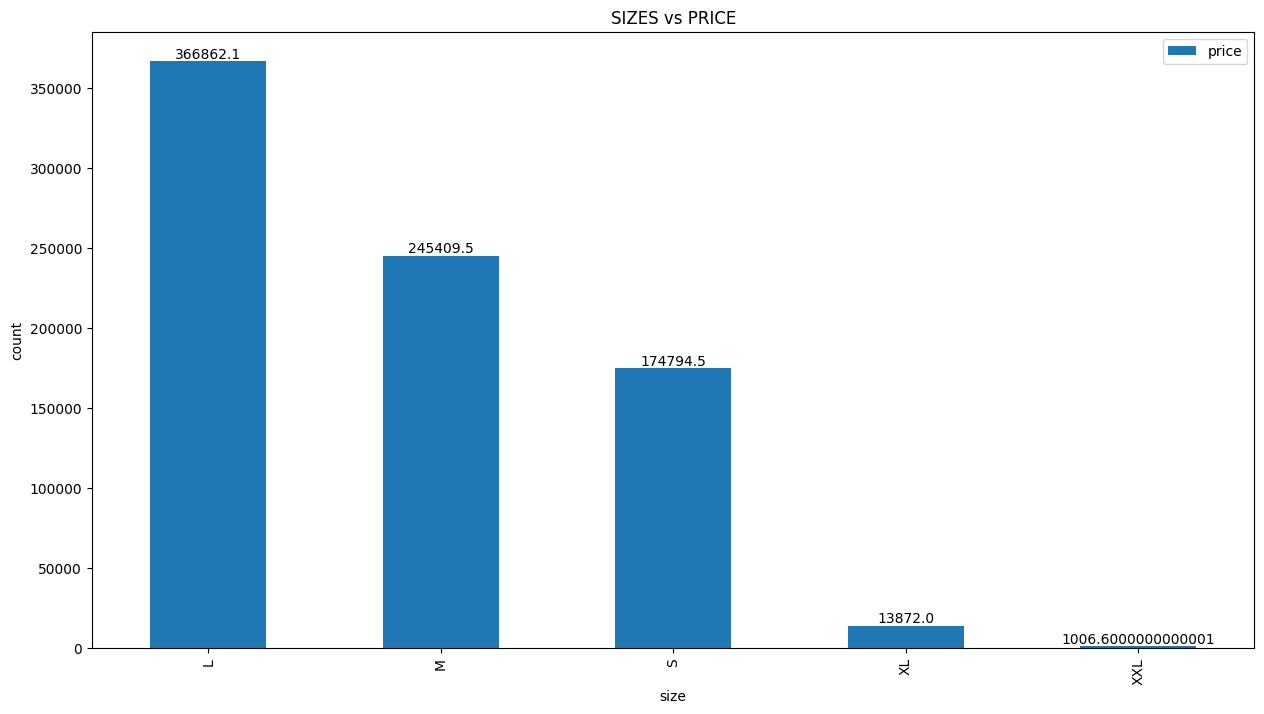

In [103]:
f.to_frame().plot(kind='bar',figsize=(15,8))
for i, v in enumerate(f):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('count')
plt.title('SIZES vs PRICE')

* **form above analysis,their is no need of take-off any pizza, but customers choose small, large & medium size pizza more **
* **large size is favorite in all catogary**
* **we can work on promotions of other category except above one with various methods like**
* Customer Segmentation
* Loyalty Programs
* Personalized Offers
* Social Media Advertising
* Collaborations and Partnerships
* Geo-Targeted Ads
* Online Reviews and Testimonials
* Email Marketing Campaigns
* Bundle Deals
* Limited-Time Offers
* Customer Favorites Menu
* Social Media Contests
* Upselling and Cross-Selling
* Customer Testimonials
* Exclusive VIP Offers
* Seasonal Variations


# **SUMMARY**
* The analysis of pizza place sales data provides actionable insights for improving operations, marketing strategies, and menu offerings. By leveraging these findings, the pizza place can enhance customer satisfaction, drive sales, and ultimately optimize business performance.
* By combining staffing adjustments during peak hours with operational optimizations during slower periods, you can create a more agile and efficient business operation.
* By combining targeted marketing strategies with the promotion of bestselling pizzas, you can create compelling campaigns that resonate with your audience and drive both new and repeat business.
* Regularly evaluating and adjusting your pizza menu based on performance is essential for keeping your offerings fresh, appealing, and aligned with customer preferences. It's important to strike a balance between maintaining popular classics and introducing innovative options to keep customers excited about your menu.
* By strategically planning seasonal promotions and offering discounts during slower seasons, you can effectively manage demand, attract new customers, and retain existing ones. It's crucial to stay flexible and adapt your promotions based on the unique characteristics of each season and the evolving preferences of your customer base.


# **CONTACT**
* KSHITIJ KHANDARE
* Gmail-id:- Kshitij.khandare@gmail.com
* Portfolio link:- https://peerlist.io/kshitij_k
* Linkedin id:- https://www.linkedin.com/in/kshitij-khandare-7a7161111
* Github id:- https://github.com/KshitijKhandare

